In [ ]:
#1. Initialize the model parameters (weights and bias) with random values.
#2. Calculate the predicted values (y-hat) using the current model parameters.
#3. Calculate the cost function (J) using the actual values (y) and the predicted values (y-hat).
#4. Calculate the gradients (partial derivatives) of the cost function with respect to each parameter.
#5. Update the model parameters by subtracting a fraction of the gradients from the current parameter values

In [2]:
#1. Initialize the model parameters (weights and bias) with random values.
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

training_dataset = pd.read_csv('/Users/olawalesalami/ML/aws-ml-bootcamp-2/StandFord Machine Learning/Data/house_prices.csv')

# For simplicity, let's use only one feature (e.g., size of the house)
X = training_dataset['size_sqft'].values
y = training_dataset['price'].values

m = X.shape[0]  # number of training examples
print(f"Number of training examples: {m}")

print(f"First 5 examples:\nX: {X[:5]}\ny: {y[:5]}")

# Initialize weights and bias
np.random.seed(0)
weights = np.random.randn(1)
bias = np.random.randn(1)
print(f"Initial weights: {weights}, Initial bias: {bias}")



Number of training examples: 1000
First 5 examples:
X: [2248.35707651 1930.86784941 2323.84426905 2761.5149282  1882.92331264]
y: [482622.77993011 304397.80664497 457008.33540129 605122.25589759
 429719.60209036]
Initial weights: [1.76405235], Initial bias: [0.40015721]


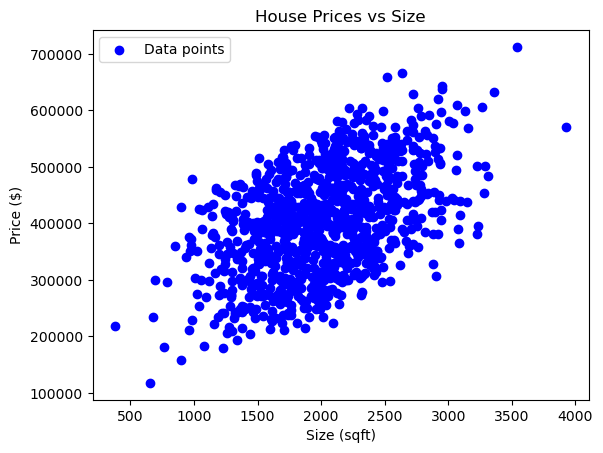

In [4]:
# plot a simple linear regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('Size (sqft)')
plt.ylabel('Price ($)')
plt.title('House Prices vs Size')
plt.legend()
plt.show()

In [5]:
#2. Calculate the predicted values (y-hat) using the current model parameters.
y_hat = weights * X + bias
print(f"Predicted values (y-hat): {y_hat[:5]}")

Predicted values (y-hat): [3966.61973259 3406.55211672 4099.78309169 4871.85704473 3321.97544415]


In [6]:
#3. Calculate the cost function (J) using the actual values (y) and the predicted values (y-hat).
def calculate_cost(y, y_hat):
    return np.mean((y - y_hat) ** 2) / 2
# Example usage of cost function
cost = calculate_cost(y, y_hat)
print(f"Cost: {cost}")  # Target with noise 

Cost: 84153824701.04037


In [7]:
#4. Calculate the gradients (partial derivatives) of the cost function with respect to each parameter.
def compute_gradients(X, y, y_hat):
    m = len(y)
    dw = (1/m) * np.dot(X, (y_hat - y))  # Gradient with respect to weights
    db = (1/m) * np.sum(y_hat - y)       # Gradient with respect to bias
    return dw, db

# Example usage of gradient computation
dw, db = compute_gradients(X, y, y_hat)
print(f"Gradient w.r.t weights: {dw}, Gradient w.r.t bias: {db}")

Gradient w.r.t weights: -825005964.9993073, Gradient w.r.t bias: -399355.6641889262


In [8]:
#5. Update the model parameters by subtracting a fraction of the gradients from the current parameter values
def gradient_descent(weights, bias, dw, db, learning_rate=0.01):
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias
# Example usage of gradient descent function
weights, bias = gradient_descent(weights, bias,dw, db, learning_rate=0.01)
print(f"Updated weights: {weights}, Updated bias: {bias}")





Updated weights: [8250061.41404542], Updated bias: [3993.9567991]


In [9]:
# predict y-hat using updated weights and bias
y_hat = weights * X + bias
print(f"Predicted values after update (y-hat): {y_hat[:5]}")



Predicted values after update (y-hat): [1.85490880e+10 1.59297823e+10 1.91718619e+10 2.27826717e+10
 1.55342370e+10]


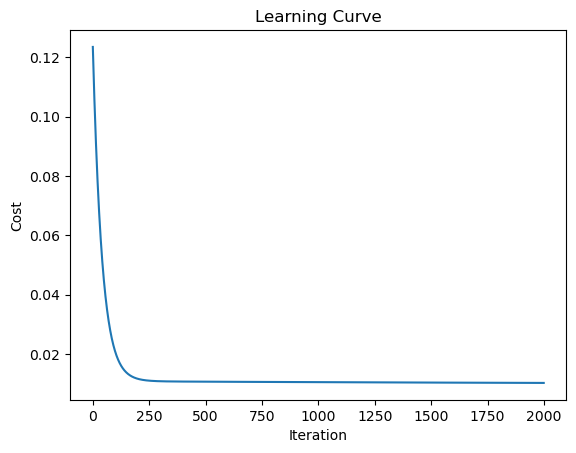

In [ ]:
# Scale the features using min-max normalization
X_scaled = (X - X.min()) / (X.max() - X.min())
y_scaled = (y - y.min()) / (y.max() - y.min())

def train_model(X, y, learning_rate=0.1, epochs=1000):
    # Initialize parameters
    np.random.seed(0)
    weights = np.random.randn(1) * 0.01
    bias = 0.0
    
    # Lists to store metrics
    costs = []
    
    # Training loop
    for epoch in range(epochs):
        # Forward pass
        y_hat = weights * X + bias
        
        # Compute cost
        cost = calculate_cost(y, y_hat)
        costs.append(cost)
        
        # Compute gradients
        dw, db = compute_gradients(X, y, y_hat)
        
        # Update parameters
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db
        
        # Print progress every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost:.4f}")
    
    return weights, bias, costs

In [24]:

# Train the model using scaled features
final_weights, final_bias, costs = train_model(X_scaled, y_scaled, learning_rate=0.1, epochs=1000)
print(f"Final weights: {final_weights}, Final bias: {final_bias}")

Epoch 0, Cost: 0.1235
Epoch 100, Cost: 0.0104
Epoch 200, Cost: 0.0102
Epoch 300, Cost: 0.0100
Epoch 400, Cost: 0.0099
Epoch 500, Cost: 0.0098
Epoch 600, Cost: 0.0097
Epoch 700, Cost: 0.0096
Epoch 800, Cost: 0.0096
Epoch 900, Cost: 0.0096
Final weights: [0.49203064], Final bias: 0.25403281976249614



Model Performance Metrics:
R² Score: 0.2070 (Higher is better, max is 1.0)
Mean Squared Error: 7059662047.87 (Lower is better)


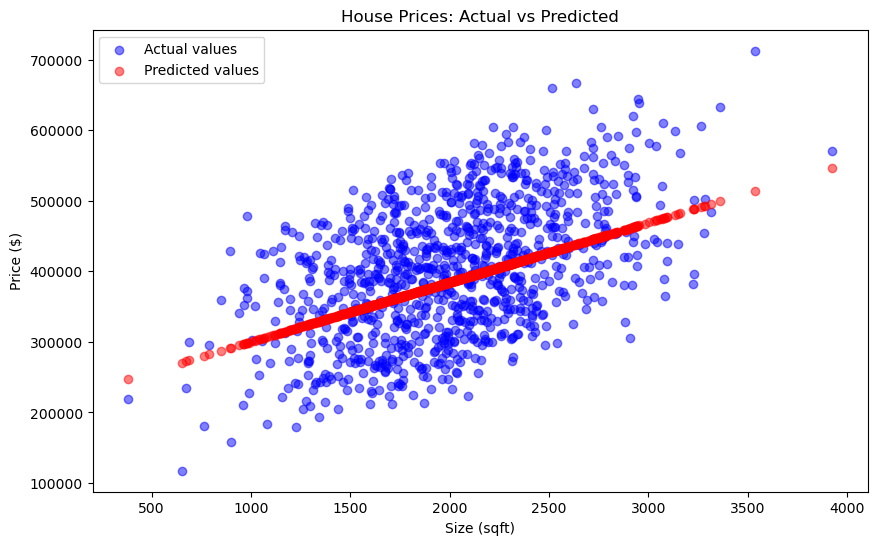

In [34]:
# Function to make predictions (with un-scaling)
def predict(X, weights, bias):
    # Scale input features
    X_scaled = (X - X.min()) / (X.max() - X.min())
    # Make prediction in scaled space
    y_pred_scaled = weights * X_scaled + bias
    # Un-scale the prediction
    y_pred = y_pred_scaled * (y.max() - y.min()) + y.min()
    return y_pred

# Make predictions
y_pred = predict(X, final_weights, final_bias)

# Calculate R² score
def r2_score(y_true, y_pred):
    residual_ss = np.sum((y_true - y_pred) ** 2)
    total_ss = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (residual_ss / total_ss)
    return r2

# Calculate metrics
r2 = r2_score(y, y_pred)
mse = np.mean((y - y_pred) ** 2)

print("\nModel Performance Metrics:")
print(f"R² Score: {r2:.4f} (Higher is better, max is 1.0)")
print(f"Mean Squared Error: {mse:.2f} (Lower is better)")

# Plot final predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual values')
plt.scatter(X, y_pred, color='red', alpha=0.5, label='Predicted values')
plt.xlabel('Size (sqft)')
plt.ylabel('Price ($)')
plt.title('House Prices: Actual vs Predicted')
plt.legend()
plt.show()


Model Performance Metrics:
R² Score: 0.2070 (Higher is better, max is 1.0)
Mean Squared Error: 7059662047.87 (Lower is better)


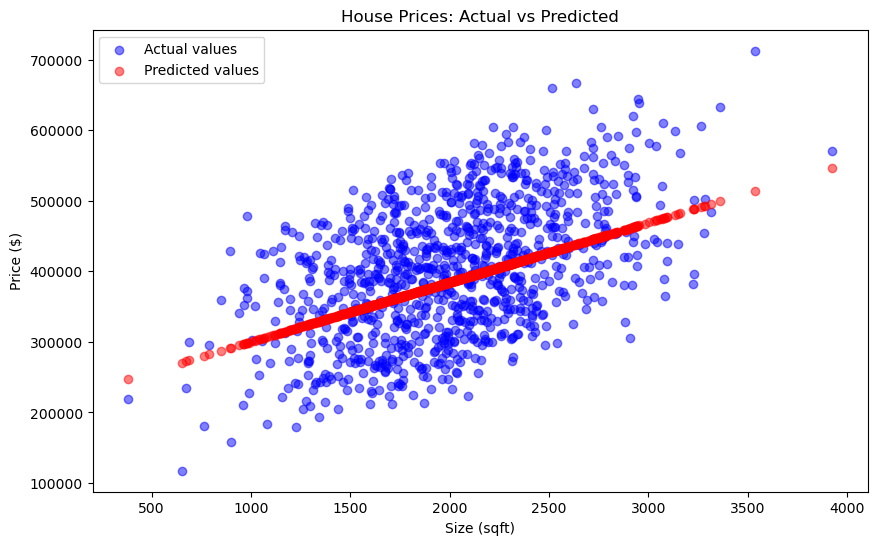

In [33]:
# Calculate R² score
def r2_score(y_true, y_pred):
    residual_ss = np.sum((y_true - y_pred) ** 2)
    total_ss = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (residual_ss / total_ss)
    return r2

# Calculate metrics
r2 = r2_score(y, y_pred)
mse = np.mean((y - y_pred) ** 2)

print("\nModel Performance Metrics:")
print(f"R² Score: {r2:.4f} (Higher is better, max is 1.0)")
print(f"Mean Squared Error: {mse:.2f} (Lower is better)")

# Plot final predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual values')
plt.scatter(X, y_pred, color='red', alpha=0.5, label='Predicted values')
plt.xlabel('Size (sqft)')
plt.ylabel('Price ($)')
plt.title('House Prices: Actual vs Predicted')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import r2_score, mean_squared_error
print(f"R² Score: {r2_score(y, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred))}")


R² Score: 0.24056168456575266
RMSE: 82225.14787556988


Epoch 0, Cost: 0.1225
Epoch 100, Cost: 0.0101
Epoch 200, Cost: 0.0098
Epoch 300, Cost: 0.0097
Epoch 400, Cost: 0.0096
Epoch 500, Cost: 0.0095
Epoch 600, Cost: 0.0094
Epoch 700, Cost: 0.0094
Epoch 800, Cost: 0.0094
Epoch 900, Cost: 0.0094
Epoch 1000, Cost: 0.0094
Epoch 1100, Cost: 0.0094
Epoch 1200, Cost: 0.0093
Epoch 1300, Cost: 0.0093
Epoch 1400, Cost: 0.0093
Epoch 1500, Cost: 0.0093
Epoch 1600, Cost: 0.0093
Epoch 1700, Cost: 0.0093
Epoch 1800, Cost: 0.0093
Epoch 1900, Cost: 0.0093
Model Performance Metrics:

Training Set:
R² Score: 0.2504
RMSE: $81,316.76

Test Set:
R² Score: 0.2238
RMSE: $84,610.22


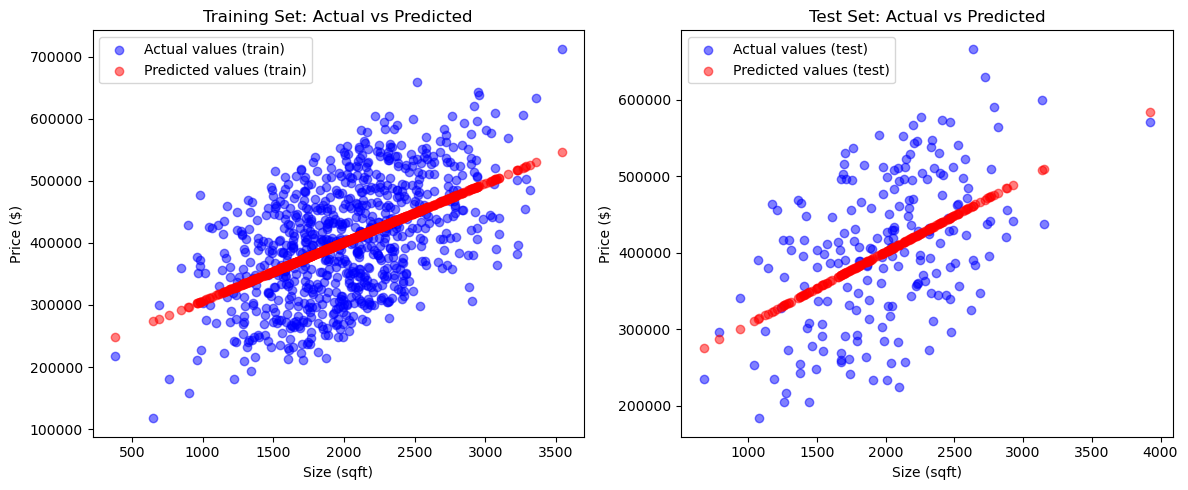


Correlation between house size and price: 0.4950

Interpretation:
- The model explains 22.4% of the variance in house prices
- Average prediction error (RMSE): $84,610.22
- The correlation coefficient suggests a
  moderate relationship between house size and price


In [35]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the training data
X_train_scaled = (X_train - X_train.min()) / (X_train.max() - X_train.min())
y_train_scaled = (y_train - y_train.min()) / (y_train.max() - y_train.min())

# Train the model on scaled training data
final_weights, final_bias, costs = train_model(X_train_scaled, y_train_scaled, learning_rate=0.1, epochs=2000)

# Make predictions on both training and test sets
def predict_with_scaling(X_new, X_train, y_train, weights, bias):
    # Scale X_new using training data's min/max
    X_scaled = (X_new - X_train.min()) / (X_train.max() - X_train.min())
    # Predict in scaled space
    y_pred_scaled = weights * X_scaled + bias
    # Unscale predictions using training data's min/max
    y_pred = y_pred_scaled * (y_train.max() - y_train.min()) + y_train.min()
    return y_pred

# Get predictions
y_train_pred = predict_with_scaling(X_train, X_train, y_train, final_weights, final_bias)
y_test_pred = predict_with_scaling(X_test, X_train, y_train, final_weights, final_bias)

# Calculate metrics for both sets
from sklearn.metrics import r2_score, mean_squared_error
print("Model Performance Metrics:")
print("\nTraining Set:")
print(f"R² Score: {r2_score(y_train, y_train_pred):.4f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_train, y_train_pred)):,.2f}")

print("\nTest Set:")
print(f"R² Score: {r2_score(y_test, y_test_pred):.4f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_test_pred)):,.2f}")

# Visualize predictions
plt.figure(figsize=(12, 5))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Actual values (train)')
plt.scatter(X_train, y_train_pred, color='red', alpha=0.5, label='Predicted values (train)')
plt.xlabel('Size (sqft)')
plt.ylabel('Price ($)')
plt.title('Training Set: Actual vs Predicted')
plt.legend()

# Test data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual values (test)')
plt.scatter(X_test, y_test_pred, color='red', alpha=0.5, label='Predicted values (test)')
plt.xlabel('Size (sqft)')
plt.ylabel('Price ($)')
plt.title('Test Set: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

# Feature importance analysis
correlation = np.corrcoef(X, y)[0, 1]
print(f"\nCorrelation between house size and price: {correlation:.4f}")
print("\nInterpretation:")
print(f"- The model explains {r2_score(y_test, y_test_pred)*100:.1f}% of the variance in house prices")
print(f"- Average prediction error (RMSE): ${np.sqrt(mean_squared_error(y_test, y_test_pred)):,.2f}")
print("- The correlation coefficient suggests a")
if abs(correlation) > 0.7:
    print("  strong relationship between house size and price")
elif abs(correlation) > 0.3:
    print("  moderate relationship between house size and price")
else:
    print("  weak relationship between house size and price")

Original Linear Model:
Epoch 0, Cost: 0.1225
Epoch 100, Cost: 0.0101
Epoch 200, Cost: 0.0098
Epoch 300, Cost: 0.0097
Epoch 400, Cost: 0.0096
Epoch 500, Cost: 0.0095
Epoch 600, Cost: 0.0094
Epoch 700, Cost: 0.0094
Epoch 800, Cost: 0.0094
Epoch 900, Cost: 0.0094
Epoch 1000, Cost: 0.0094
Epoch 1100, Cost: 0.0094
Epoch 1200, Cost: 0.0093
Epoch 1300, Cost: 0.0093
Epoch 1400, Cost: 0.0093
Epoch 1500, Cost: 0.0093
Epoch 1600, Cost: 0.0093
Epoch 1700, Cost: 0.0093
Epoch 1800, Cost: 0.0093
Epoch 1900, Cost: 0.0093

Original Linear Model
Training Set:
R² Score: 0.2504
RMSE: $81,316.76

Test Set:
R² Score: 0.2238
RMSE: $84,610.22

Log-transformed Model:
Epoch 0, Cost: 0.2230
Epoch 100, Cost: 0.0074
Epoch 200, Cost: 0.0074
Epoch 300, Cost: 0.0073
Epoch 400, Cost: 0.0073
Epoch 500, Cost: 0.0072
Epoch 600, Cost: 0.0072
Epoch 700, Cost: 0.0072
Epoch 800, Cost: 0.0072
Epoch 900, Cost: 0.0072
Epoch 1000, Cost: 0.0071
Epoch 1100, Cost: 0.0071
Epoch 1200, Cost: 0.0071
Epoch 1300, Cost: 0.0071
Epoch 1400,

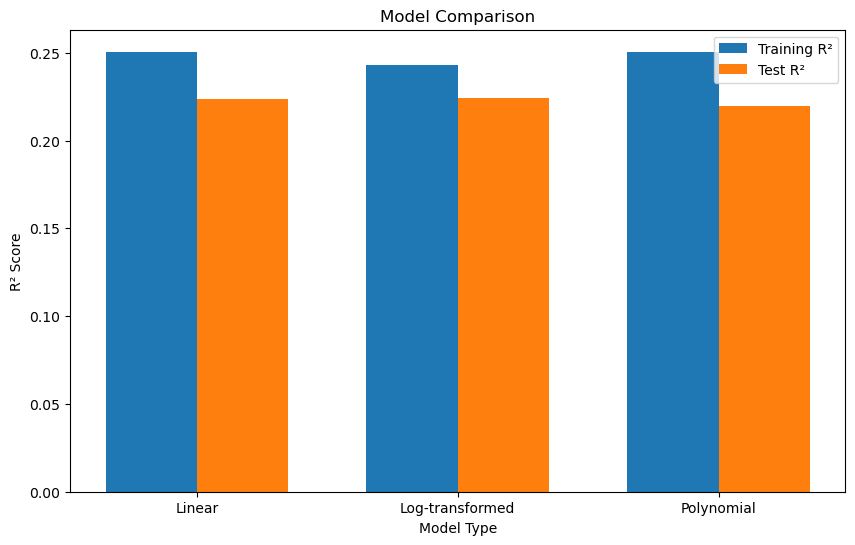


Conclusion: The Log-transformed model performs best on the test set.


In [36]:
# Let's try different feature transformations and see which works best
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# 1. Log transformation
X_log = np.log1p(X)  # log1p handles zero values
y_log = np.log1p(y)

# 2. Polynomial features (up to degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X.reshape(-1, 1))

# Function to evaluate different models
def evaluate_model(X, y, title):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    if len(X.shape) == 1:
        X_train_scaled = (X_train - X_train.min()) / (X_train.max() - X_train.min())
    else:
        X_train_scaled = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
    y_train_scaled = (y_train - y_train.min()) / (y_train.max() - y_train.min())
    
    # Train model
    if len(X.shape) == 1:
        final_weights, final_bias, costs = train_model(X_train_scaled, y_train_scaled, learning_rate=0.1, epochs=2000)
        
        # Make predictions
        y_train_pred = predict_with_scaling(X_train, X_train, y_train, final_weights, final_bias)
        y_test_pred = predict_with_scaling(X_test, X_train, y_train, final_weights, final_bias)
    else:
        # For polynomial features, we need to modify the prediction function
        final_weights = np.zeros(X.shape[1])
        final_bias = 0
        for epoch in range(2000):
            y_hat = X_train_scaled.dot(final_weights) + final_bias
            dw = (1/len(y_train)) * X_train_scaled.T.dot(y_hat - y_train_scaled)
            db = (1/len(y_train)) * np.sum(y_hat - y_train_scaled)
            final_weights = final_weights - 0.1 * dw
            final_bias = final_bias - 0.1 * db
        
        # Scale test data
        X_test_scaled = (X_test - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
        
        # Make predictions
        y_train_pred_scaled = X_train_scaled.dot(final_weights) + final_bias
        y_test_pred_scaled = X_test_scaled.dot(final_weights) + final_bias
        
        # Unscale predictions
        y_train_pred = y_train_pred_scaled * (y_train.max() - y_train.min()) + y_train.min()
        y_test_pred = y_test_pred_scaled * (y_train.max() - y_train.min()) + y_train.min()
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f"\n{title}")
    print("Training Set:")
    print(f"R² Score: {train_r2:.4f}")
    print(f"RMSE: ${train_rmse:,.2f}")
    print("\nTest Set:")
    print(f"R² Score: {test_r2:.4f}")
    print(f"RMSE: ${test_rmse:,.2f}")
    
    return train_r2, test_r2, train_rmse, test_rmse

# Evaluate different models
print("Original Linear Model:")
original_metrics = evaluate_model(X, y, "Original Linear Model")

print("\nLog-transformed Model:")
log_metrics = evaluate_model(X_log, y_log, "Log-transformed Model")
# Convert RMSE back to original scale for log-transformed model
log_train_rmse = np.exp(log_metrics[2]) - 1
log_test_rmse = np.exp(log_metrics[3]) - 1
print(f"RMSE (original scale) - Train: ${log_train_rmse:,.2f}, Test: ${log_test_rmse:,.2f}")

print("\nPolynomial Model:")
poly_metrics = evaluate_model(X_poly, y, "Polynomial Model")

# Create a bar plot comparing R² scores
models = ['Linear', 'Log-transformed', 'Polynomial']
train_scores = [original_metrics[0], log_metrics[0], poly_metrics[0]]
test_scores = [original_metrics[1], log_metrics[1], poly_metrics[1]]

plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Training R²')
plt.bar(x + width/2, test_scores, width, label='Test R²')

plt.xlabel('Model Type')
plt.ylabel('R² Score')
plt.title('Model Comparison')
plt.xticks(x, models)
plt.legend()
plt.show()

# Print conclusion
best_model = models[np.argmax([m[1] for m in [original_metrics, log_metrics, poly_metrics]])]
print(f"\nConclusion: The {best_model} model performs best on the test set.")